# Prepare Data from Robertson 2010

> Joseph P. Vantassel

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# qt

In [89]:
qt_mpa = pd.read_csv("raw/robertson_2010_3a.csv", names=["qt", "depth"])
qt_mpa.sort_values(by=["depth"], inplace=True)
qt_mpa["qt"][qt_mpa["qt"]<0.3] = 0.3
qt_mpa.head()

,qt,depth
10,1.083524,1.658450
3,0.899150,2.065937
9,0.737823,2.430073
5,0.622589,2.750844
2,0.300000,3.990998


In [90]:
qt_kpa = qt_mpa.qt.to_numpy() * 1000
depth = qt_mpa.depth.to_numpy()

interp = interp1d(depth, qt_kpa)

depths = np.arange(2, 29.9, 0.1)
qt = interp(depths)

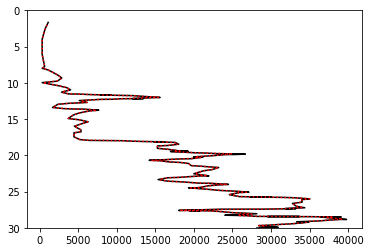

In [91]:
plt.plot(qt_kpa, depth, color="k")
plt.plot(qt, depths, color="r", linestyle=":")
plt.ylim(30, 0)
plt.show()

## Rf

In [92]:
rf = pd.read_csv("raw/robertson_2010_3b.csv", names=["rf", "depth"])
rf.sort_values(by=["depth"], inplace=True)
rf.head()

,rf,depth
186,2.978958,1.586134
169,2.806530,1.686890
150,2.599577,1.734560
126,2.392638,1.808230
105,2.185723,1.927404


In [93]:
_rf = rf.rf.to_numpy()
_depth = rf.depth.to_numpy()

interp = interp1d(_depth, _rf)

rfs = interp(depths)

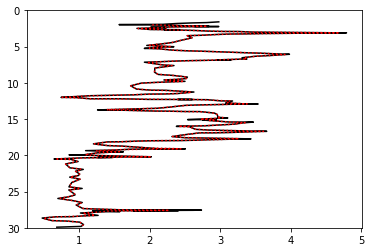

In [94]:
plt.plot(rf.rf, rf.depth, color="k")
plt.plot(rfs, depths, color="r", linestyle=":")
plt.ylim(30, 0)
plt.show()

## Isbt

In [95]:
isbt = pd.read_csv("raw/robertson_2010_3c.csv", names=["isbt", "depth"])
isbt.sort_values(by=["depth"], inplace=True)
isbt.head()

,isbt,depth
266,3.017746,1.544387
260,2.991831,1.631747
257,2.893105,1.733611
254,2.836338,1.843064
244,2.761914,1.959938


In [96]:
_isbt = isbt.isbt.to_numpy()
_depth = isbt.depth.to_numpy()

interp = interp1d(_depth, _isbt)

isbts = interp(depths)

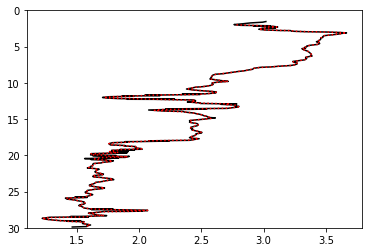

In [97]:
plt.plot(isbt.isbt, isbt.depth, color="k")
plt.plot(isbts, depths, color="r", linestyle=":")
plt.ylim(30, 0)
plt.show()

## Save Results

In [98]:
with open("input.csv", "w") as f:
    f.write("depth,qc,fs\n")
    for dp, _qt, fs in zip(depths, qt, qt*rfs/100):
        f.write(f"{dp},{_qt},{fs}\n")

In [99]:
with open("results.csv", "w") as f:
    f.write("depth,qc,fr,isbt\n")
    for dp, _qt, rf, isbt in zip(depths, qt, rfs, isbts):
        f.write(f"{dp},{_qt},{rf},{isbt}\n")